# Machine Learning: Random Forests

In this notebook, we are going to perform random forests models for percent change of land value (both price unajusted and ajusted for inflation) in Westlake and the surrounding neighborhoods (Koreatown, Pico Union, Silver Lake, Downtown and Echo Park) to predict the future level of gentrification of these neighborhoods. 

**Data Joining and Merging**

In the first part, we both join and merge the land value dataset (for our percent change of land value data as y variable) and gentrification variables dataset (for the varibles we think which have impacts on gentrification including education, income, rent, and ethinicity as x varibles) for the random forests models.

In [1]:
import pandas as pd
import geopandas as gpd

First, we import the two datasets

In [2]:
#import landvalue dataset
gdf_landvalue = gpd.read_file('/Users/jinglanlin/Desktop/School/01 UCLA/04 Spring 2022/UP 229 DS/Github/UDS-Project--Full-Team-/final_pctchange_landvalue.geojson')
gdf_landvalue

,CT20_left,pct_change_wo_inflation,pct_change_w_inflation,center_lat,center_lon,neighborhood,geometry
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0..."
1,195400,0.914325,0.608676,34.08439266,-118.27289005,Silver Lake,"POLYGON ((-118.27208 34.09523, -118.27223 34.0..."
2,195500,1.177144,0.829532,34.08442617,-118.26054948,Echo Park,"POLYGON ((-118.25862 34.09199, -118.25866 34.0..."
3,195600,1.265756,0.903997,34.07904517,-118.26702481,Echo Park,"POLYGON ((-118.26196 34.08222, -118.26207 34.0..."
4,195710,1.692401,1.262522,34.07296112,-118.27201440,Westlake,"POLYGON ((-118.26497 34.07740, -118.26513 34.0..."
...,...,...,...,...,...,...,...
72,221220,1.154156,0.810215,34.04188868,-118.29215126,Pico-Union,"POLYGON ((-118.29837 34.03998, -118.29742 34.0..."
73,221602,2.357251,1.821219,34.03882586,-118.28679410,Pico-Union,"POLYGON ((-118.28453 34.04005, -118.28479 34.0..."
74,224200,0.530880,0.286454,34.03846888,-118.28000305,Pico-Union,"POLYGON ((-118.27389 34.03824, -118.27387 34.0..."
75,224310,0.590062,0.336186,34.04267075,-118.28316270,Pico-Union,"POLYGON ((-118.28291 34.04128, -118.28243 34.0..."


In [3]:
#rename CT20 column for joining
gdf_landvalue =gdf_landvalue.rename(columns={'CT20_left': 'CT20'})
gdf_landvalue

,CT20,pct_change_wo_inflation,pct_change_w_inflation,center_lat,center_lon,neighborhood,geometry
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0..."
1,195400,0.914325,0.608676,34.08439266,-118.27289005,Silver Lake,"POLYGON ((-118.27208 34.09523, -118.27223 34.0..."
2,195500,1.177144,0.829532,34.08442617,-118.26054948,Echo Park,"POLYGON ((-118.25862 34.09199, -118.25866 34.0..."
3,195600,1.265756,0.903997,34.07904517,-118.26702481,Echo Park,"POLYGON ((-118.26196 34.08222, -118.26207 34.0..."
4,195710,1.692401,1.262522,34.07296112,-118.27201440,Westlake,"POLYGON ((-118.26497 34.07740, -118.26513 34.0..."
...,...,...,...,...,...,...,...
72,221220,1.154156,0.810215,34.04188868,-118.29215126,Pico-Union,"POLYGON ((-118.29837 34.03998, -118.29742 34.0..."
73,221602,2.357251,1.821219,34.03882586,-118.28679410,Pico-Union,"POLYGON ((-118.28453 34.04005, -118.28479 34.0..."
74,224200,0.530880,0.286454,34.03846888,-118.28000305,Pico-Union,"POLYGON ((-118.27389 34.03824, -118.27387 34.0..."
75,224310,0.590062,0.336186,34.04267075,-118.28316270,Pico-Union,"POLYGON ((-118.28291 34.04128, -118.28243 34.0..."


In [4]:
#import other gentrification variables data
gdf_variables = gpd.read_file('/Users/jinglanlin/Desktop/School/01 UCLA/04 Spring 2022/UP 229 DS/Github/UDS-Project--Full-Team-/Full_variable_list_5.30.22.geojson')
gdf_variables

,name,GEOID,Typology,Typology_numeric,Typology_numeric2,CT20,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,...,white_pop_percent_change,bachelorsplus_percent_change,Westlake,Pico-Union,Koreatown,Echo Park,Downtown,Silver Lake,cluster_id,geometry
0,Westlake,6.037210e+09,Advanced Gentrification,8.0,4.0,210010,-0.090301,0.520134,0.120032,0.065907,...,0.648831,0.916215,1,0,0,0,0,0,2,"POLYGON ((-118.27259 34.04308, -118.27243 34.0..."
1,Westlake,6.037209e+09,Early/Ongoing Gentrification,5.0,3.0,209300,-0.139194,0.270859,-0.063634,0.376511,...,-0.126527,0.011439,1,0,0,0,0,0,2,"POLYGON ((-118.26652 34.04788, -118.26642 34.0..."
2,Westlake,6.037211e+09,Early/Ongoing Gentrification,5.0,3.0,211122,0.003922,0.444040,0.063966,0.190279,...,0.899744,0.113059,1,0,0,0,0,0,2,"POLYGON ((-118.29051 34.07633, -118.29170 34.0..."
3,Westlake,6.037193e+09,Early/Ongoing Gentrification,5.0,3.0,192700,0.060714,0.579470,0.163751,0.384261,...,0.545329,0.577466,1,0,0,0,0,0,2,"POLYGON ((-118.28442 34.07715, -118.28442 34.0..."
4,Westlake,6.037208e+09,At Risk of Gentrification,7.0,4.0,208302,-0.051724,0.361851,0.003410,0.682266,...,0.975671,0.734777,1,0,0,0,0,0,0,"POLYGON ((-118.25966 34.06201, -118.25974 34.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Pico-Union,6.037222e+09,Early/Ongoing Gentrification,5.0,3.0,221710,-0.107784,0.432039,0.055124,0.818795,...,0.485507,2.308710,0,1,0,0,0,0,3,"POLYGON ((-118.28402 34.03683, -118.28402 34.0..."
124,Pico-Union,6.037221e+09,Low-Income/Susceptible to Displacement,4.0,2.0,221120,-0.142857,0.191313,-0.122242,0.439254,...,-0.411594,0.563381,0,1,0,0,0,0,0,"POLYGON ((-118.28413 34.04184, -118.28414 34.0..."
125,Pico-Union,6.037210e+09,Advanced Gentrification,8.0,4.0,209820,-0.110837,0.253197,-0.076647,0.688634,...,1.007048,0.903833,0,1,0,0,0,0,3,"POLYGON ((-118.27668 34.04519, -118.27651 34.0..."
126,Pico-Union,6.037210e+09,At Risk of Gentrification,7.0,4.0,209810,0.130435,0.458671,0.074746,0.181293,...,0.229048,0.036598,0,1,0,0,0,0,2,"POLYGON ((-118.28041 34.04819, -118.28061 34.0..."


In [5]:
gdf_variables = gdf_variables.drop(['Westlake'], axis=1)
gdf_variables = gdf_variables.drop(['Pico-Union'], axis=1)
gdf_variables = gdf_variables.drop(['Echo Park'], axis=1)
gdf_variables = gdf_variables.drop(['Downtown'], axis=1)
gdf_variables = gdf_variables.drop(['Silver Lake'], axis=1)
gdf_variables = gdf_variables.drop(['Koreatown'], axis=1)
gdf_variables

,name,GEOID,Typology,Typology_numeric,Typology_numeric2,CT20,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id,geometry
0,Westlake,6.037210e+09,Advanced Gentrification,8.0,4.0,210010,-0.090301,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,2,"POLYGON ((-118.27259 34.04308, -118.27243 34.0..."
1,Westlake,6.037209e+09,Early/Ongoing Gentrification,5.0,3.0,209300,-0.139194,0.270859,-0.063634,0.376511,0.009882,0.099242,-0.193537,-0.126527,0.011439,2,"POLYGON ((-118.26652 34.04788, -118.26642 34.0..."
2,Westlake,6.037211e+09,Early/Ongoing Gentrification,5.0,3.0,211122,0.003922,0.444040,0.063966,0.190279,0.329279,-0.049477,0.061524,0.899744,0.113059,2,"POLYGON ((-118.29051 34.07633, -118.29170 34.0..."
3,Westlake,6.037193e+09,Early/Ongoing Gentrification,5.0,3.0,192700,0.060714,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466,2,"POLYGON ((-118.28442 34.07715, -118.28442 34.0..."
4,Westlake,6.037208e+09,At Risk of Gentrification,7.0,4.0,208302,-0.051724,0.361851,0.003410,0.682266,3.261550,0.343410,2.403152,0.975671,0.734777,0,"POLYGON ((-118.25966 34.06201, -118.25974 34.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Pico-Union,6.037222e+09,Early/Ongoing Gentrification,5.0,3.0,221710,-0.107784,0.432039,0.055124,0.818795,0.418684,0.452437,0.132920,0.485507,2.308710,3,"POLYGON ((-118.28402 34.03683, -118.28402 34.0..."
124,Pico-Union,6.037221e+09,Low-Income/Susceptible to Displacement,4.0,2.0,221120,-0.142857,0.191313,-0.122242,0.439254,2.580590,0.149347,1.859356,-0.411594,0.563381,0,"POLYGON ((-118.28413 34.04184, -118.28414 34.0..."
125,Pico-Union,6.037210e+09,Advanced Gentrification,8.0,4.0,209820,-0.110837,0.253197,-0.076647,0.688634,-0.040333,0.348495,-0.233638,1.007048,0.903833,3,"POLYGON ((-118.27668 34.04519, -118.27651 34.0..."
126,Pico-Union,6.037210e+09,At Risk of Gentrification,7.0,4.0,209810,0.130435,0.458671,0.074746,0.181293,0.413179,-0.056653,0.128524,0.229048,0.036598,2,"POLYGON ((-118.28041 34.04819, -118.28061 34.0..."


Then, we join the two datasets on geometry.

In [6]:
joingdf=gpd.sjoin(gdf_landvalue.to_crs('EPSG:4326'),gdf_variables.to_crs('EPSG:4326'),how='left',predicate='intersects')
joingdf

,CT20_left,pct_change_wo_inflation,pct_change_w_inflation,center_lat,center_lon,neighborhood,geometry,index_right,name,GEOID,...,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",70,Silver Lake,6.037195e+09,...,0.037634,0.361210,0.002937,1.050864,0.723906,0.637762,0.376662,0.072989,0.043345,2
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",64,Silver Lake,6.037195e+09,...,0.070423,0.466216,0.080306,0.434956,0.031058,0.145915,-0.176626,-0.017694,0.207923,2
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",57,Silver Lake,6.037196e+09,...,-0.101626,0.218633,-0.102114,0.326262,0.175765,0.059115,-0.061067,0.113466,0.111363,2
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",38,Echo Park,6.037196e+09,...,-0.101626,0.218633,-0.102114,0.326262,0.175765,0.059115,-0.061067,0.113466,0.111363,2
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",63,Silver Lake,6.037195e+09,...,0.037209,0.603986,0.181814,0.361443,0.492932,0.087209,0.192213,0.005806,0.190026,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,224320,0.614469,0.356696,34.03912567,-118.28154557,Pico-Union,"POLYGON ((-118.27982 34.04055, -118.27917 34.0...",121,Pico-Union,6.037224e+09,...,-0.162252,0.341577,-0.011529,-0.083896,-0.239708,-0.268425,-0.392852,0.523835,0.029823,2
76,224320,0.614469,0.356696,34.03912567,-118.28154557,Pico-Union,"POLYGON ((-118.27982 34.04055, -118.27917 34.0...",0,Westlake,6.037210e+09,...,-0.090301,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,2
76,224320,0.614469,0.356696,34.03912567,-118.28154557,Pico-Union,"POLYGON ((-118.27982 34.04055, -118.27917 34.0...",110,Pico-Union,6.037210e+09,...,-0.090301,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,2
76,224320,0.614469,0.356696,34.03912567,-118.28154557,Pico-Union,"POLYGON ((-118.27982 34.04055, -118.27917 34.0...",30,Downtown,6.037210e+09,...,-0.090301,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,2


Interestingly, after spatial joining the two datasets, we end up having 593 rows of data comparing to 77 rows and 128 rows for the orginal land value and gentrification variables dataset respectively. In other words, there are a lot of duplicates after joining the two datasets. We think the reason we have so many duplicates is because the inconsitency of grouping when we did our data cleanup. While we group the dataset of land value by census tracts (CT20) from the 2020 census tracts data, we group the gentrification variables data by GEOID. Thus, grouping by census tracts from different sources may contribute to the duplicates. 

Even though we could not perfectly clean up the duplicates because we were not sure if it would be appropriate to drop them because some column values of the duplicates are slightly different, we go ahead to use this data for random forests model to see if we can find meaningful results.

Next step, because of the imperfect joining dataframe, we attempt to merge the two datasets on CT20 instead of spatially join and plug into random forests for possible meaningful outputs.

In [7]:
#convert datatype for merging
gdf_variables['CT20'] = gdf_variables.CT20.astype(int)
gdf_variables.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   name                                              128 non-null    object  
 1   GEOID                                             128 non-null    float64 
 2   Typology                                          128 non-null    object  
 3   Typology_numeric                                  128 non-null    float64 
 4   Typology_numeric2                                 128 non-null    float64 
 5   CT20                                              128 non-null    int64   
 6   Total_hh_percent_change                           128 non-null    float64 
 7   rent_percent_change                               128 non-null    float64 
 8   rent_percent_change_inflation                     128 non-null    float64 
 9   in

In [8]:
#drop the duplicates in gdf_variables
gdf_variables.drop_duplicates(subset='CT20', keep='first', inplace=True)
gdf_variables

,name,GEOID,Typology,Typology_numeric,Typology_numeric2,CT20,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id,geometry
0,Westlake,6.037210e+09,Advanced Gentrification,8.0,4.0,210010,-0.090301,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,2,"POLYGON ((-118.27259 34.04308, -118.27243 34.0..."
1,Westlake,6.037209e+09,Early/Ongoing Gentrification,5.0,3.0,209300,-0.139194,0.270859,-0.063634,0.376511,0.009882,0.099242,-0.193537,-0.126527,0.011439,2,"POLYGON ((-118.26652 34.04788, -118.26642 34.0..."
2,Westlake,6.037211e+09,Early/Ongoing Gentrification,5.0,3.0,211122,0.003922,0.444040,0.063966,0.190279,0.329279,-0.049477,0.061524,0.899744,0.113059,2,"POLYGON ((-118.29051 34.07633, -118.29170 34.0..."
3,Westlake,6.037193e+09,Early/Ongoing Gentrification,5.0,3.0,192700,0.060714,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466,2,"POLYGON ((-118.28442 34.07715, -118.28442 34.0..."
4,Westlake,6.037208e+09,At Risk of Gentrification,7.0,4.0,208302,-0.051724,0.361851,0.003410,0.682266,3.261550,0.343410,2.403152,0.975671,0.734777,0,"POLYGON ((-118.25966 34.06201, -118.25974 34.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Pico-Union,6.037224e+09,Advanced Gentrification,8.0,4.0,224310,-0.022346,0.262338,-0.069912,0.390847,-0.163167,0.110691,-0.331729,0.859842,0.943343,3,"POLYGON ((-118.28291 34.04128, -118.28243 34.0..."
123,Pico-Union,6.037222e+09,Early/Ongoing Gentrification,5.0,3.0,221710,-0.107784,0.432039,0.055124,0.818795,0.418684,0.452437,0.132920,0.485507,2.308710,3,"POLYGON ((-118.28402 34.03683, -118.28402 34.0..."
124,Pico-Union,6.037221e+09,Low-Income/Susceptible to Displacement,4.0,2.0,221120,-0.142857,0.191313,-0.122242,0.439254,2.580590,0.149347,1.859356,-0.411594,0.563381,0,"POLYGON ((-118.28413 34.04184, -118.28414 34.0..."
125,Pico-Union,6.037210e+09,Advanced Gentrification,8.0,4.0,209820,-0.110837,0.253197,-0.076647,0.688634,-0.040333,0.348495,-0.233638,1.007048,0.903833,3,"POLYGON ((-118.27668 34.04519, -118.27651 34.0..."


In [9]:
#merge the land value data and gentrification variables data on CT20
mergegdf = gdf_landvalue.merge(gdf_variables, on=['CT20'],how='left')
mergegdf

,CT20,pct_change_wo_inflation,pct_change_w_inflation,center_lat,center_lon,neighborhood,geometry_x,name,GEOID,Typology,...,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id,geometry_y
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",Silver Lake,6.037195e+09,Stable/Advanced Exclusive,...,0.603986,0.181814,0.361443,0.492932,0.087209,0.192213,0.005806,0.190026,2.0,"POLYGON ((-118.25925 34.09713, -118.25924 34.0..."
1,195400,0.914325,0.608676,34.08439266,-118.27289005,Silver Lake,"POLYGON ((-118.27208 34.09523, -118.27223 34.0...",Silver Lake,6.037195e+09,Stable Moderate/Mixed Income,...,0.361210,0.002937,1.050864,0.723906,0.637762,0.376662,0.072989,0.043345,2.0,"POLYGON ((-118.27208 34.09523, -118.27223 34.0..."
2,195500,1.177144,0.829532,34.08442617,-118.26054948,Echo Park,"POLYGON ((-118.25862 34.09199, -118.25866 34.0...",Echo Park,6.037196e+09,Advanced Gentrification,...,0.218633,-0.102114,0.326262,0.175765,0.059115,-0.061067,0.113466,0.111363,2.0,"POLYGON ((-118.25862 34.09199, -118.25866 34.0..."
3,195600,1.265756,0.903997,34.07904517,-118.26702481,Echo Park,"POLYGON ((-118.26196 34.08222, -118.26207 34.0...",Echo Park,6.037196e+09,Advanced Gentrification,...,0.320175,-0.027297,-0.060814,-0.060761,-0.249993,-0.249951,0.278152,0.050856,2.0,"POLYGON ((-118.26196 34.08222, -118.26207 34.0..."
4,195710,1.692401,1.262522,34.07296112,-118.27201440,Westlake,"POLYGON ((-118.26497 34.07740, -118.26513 34.0...",Westlake,6.037196e+09,Early/Ongoing Gentrification,...,0.740093,0.282098,0.241759,1.775012,-0.008367,1.216046,0.748473,0.483924,0.0,"POLYGON ((-118.26497 34.07740, -118.26513 34.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,221220,1.154156,0.810215,34.04188868,-118.29215126,Pico-Union,"POLYGON ((-118.29837 34.03998, -118.29742 34.0...",Pico-Union,6.037221e+09,Early/Ongoing Gentrification,...,0.329223,-0.020631,0.521583,0.237051,0.215093,-0.012127,1.317035,0.854305,3.0,"POLYGON ((-118.29837 34.03998, -118.29742 34.0..."
73,221602,2.357251,1.821219,34.03882586,-118.28679410,Pico-Union,"POLYGON ((-118.28453 34.04005, -118.28479 34.0...",Pico-Union,6.037222e+09,Low-Income/Susceptible to Displacement,...,0.517426,0.118037,1.067050,-0.217920,0.650687,-0.375453,1.304751,2.351067,3.0,"POLYGON ((-118.28453 34.04005, -118.28479 34.0..."
74,224200,0.530880,0.286454,34.03846888,-118.28000305,Pico-Union,"POLYGON ((-118.27389 34.03824, -118.27387 34.0...",Downtown,6.037224e+09,Ongoing Displacement,...,0.915078,0.411026,1.035441,0.988328,0.625445,0.587822,0.960282,5.416108,1.0,"POLYGON ((-118.27389 34.03824, -118.27387 34.0..."
75,224310,0.590062,0.336186,34.04267075,-118.28316270,Pico-Union,"POLYGON ((-118.28291 34.04128, -118.28243 34.0...",Pico-Union,6.037224e+09,Advanced Gentrification,...,0.262338,-0.069912,0.390847,-0.163167,0.110691,-0.331729,0.859842,0.943343,3.0,"POLYGON ((-118.28291 34.04128, -118.28243 34.0..."


# Random Forests

The following part is our attempt to use random forests models to predict change in land value based on the gentrification variables we pick. We did the classifications with both continuous and dichotomous variables.

## Dichotomous Variables

**Random Forests 1: percent change of land value withou inflation (joingdf)**

Given our y varialbe is a continous variable, we first convert it to a dichotomous variable. This is the tricky part we encountered. How do we decide the benchmark of being True or False. Eventually, without an obvious benchmark in the dataset, we decide to use the mean of percent change as the benchmark. The percent change greater than the mean is considered "True" as "more gentrified" and the percent change less than the mean is considered "False" as "less gentrified. Then we use this self-determined True/False as the y variable for prediction.

In [10]:
#find the mean value
joingdf['pct_change_wo_inflation'].mean()

2.502936809736841

In [11]:
#create a new column for the dichotomous variable
joingdf['pct_change_wo_inflation_1'] = joingdf['pct_change_wo_inflation'].apply(lambda x: 'True' if x >= 2.50 else 'False')
joingdf

,CT20_left,pct_change_wo_inflation,pct_change_w_inflation,center_lat,center_lon,neighborhood,geometry,index_right,name,GEOID,...,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id,pct_change_wo_inflation_1
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",70,Silver Lake,6.037195e+09,...,0.361210,0.002937,1.050864,0.723906,0.637762,0.376662,0.072989,0.043345,2,False
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",64,Silver Lake,6.037195e+09,...,0.466216,0.080306,0.434956,0.031058,0.145915,-0.176626,-0.017694,0.207923,2,False
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",57,Silver Lake,6.037196e+09,...,0.218633,-0.102114,0.326262,0.175765,0.059115,-0.061067,0.113466,0.111363,2,False
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",38,Echo Park,6.037196e+09,...,0.218633,-0.102114,0.326262,0.175765,0.059115,-0.061067,0.113466,0.111363,2,False
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",63,Silver Lake,6.037195e+09,...,0.603986,0.181814,0.361443,0.492932,0.087209,0.192213,0.005806,0.190026,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,224320,0.614469,0.356696,34.03912567,-118.28154557,Pico-Union,"POLYGON ((-118.27982 34.04055, -118.27917 34.0...",121,Pico-Union,6.037224e+09,...,0.341577,-0.011529,-0.083896,-0.239708,-0.268425,-0.392852,0.523835,0.029823,2,False
76,224320,0.614469,0.356696,34.03912567,-118.28154557,Pico-Union,"POLYGON ((-118.27982 34.04055, -118.27917 34.0...",0,Westlake,6.037210e+09,...,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,2,False
76,224320,0.614469,0.356696,34.03912567,-118.28154557,Pico-Union,"POLYGON ((-118.27982 34.04055, -118.27917 34.0...",110,Pico-Union,6.037210e+09,...,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,2,False
76,224320,0.614469,0.356696,34.03912567,-118.28154557,Pico-Union,"POLYGON ((-118.27982 34.04055, -118.27917 34.0...",30,Downtown,6.037210e+09,...,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,2,False


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#random forest with TRUE/FALSE column

xvars = ['Total_hh_percent_change', 'rent_percent_change', 'income_family_percent_change','income_nonfamily_percent_change','white_pop_percent_change','bachelorsplus_percent_change']
yvar = 'pct_change_wo_inflation_1'

# create a dataframe with no NaNs
df_to_fit = joingdf[xvars+[yvar]].dropna()

X_train, X_test, y_train, y_test = train_test_split(
    df_to_fit[xvars], df_to_fit[yvar], test_size = 0.25, random_state = 1)

# check we have a reasonable split
print(len(X_train), len(y_train) )
print(len(X_test), len(y_test) )

444 444
149 149


In [14]:
X_train.head()

,Total_hh_percent_change,rent_percent_change,income_family_percent_change,income_nonfamily_percent_change,white_pop_percent_change,bachelorsplus_percent_change
56,0.102703,0.451247,0.358643,0.746439,0.288198,0.029118
55,-0.207207,0.453071,0.919925,1.212148,1.595737,0.628596
1,0.037209,0.603986,0.361443,0.492932,0.005806,0.190026
63,0.091667,0.499455,0.212164,0.573902,0.561095,0.296025
39,-0.044369,0.451501,0.769360,0.469872,0.101331,0.165816


In [15]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators = 50, random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

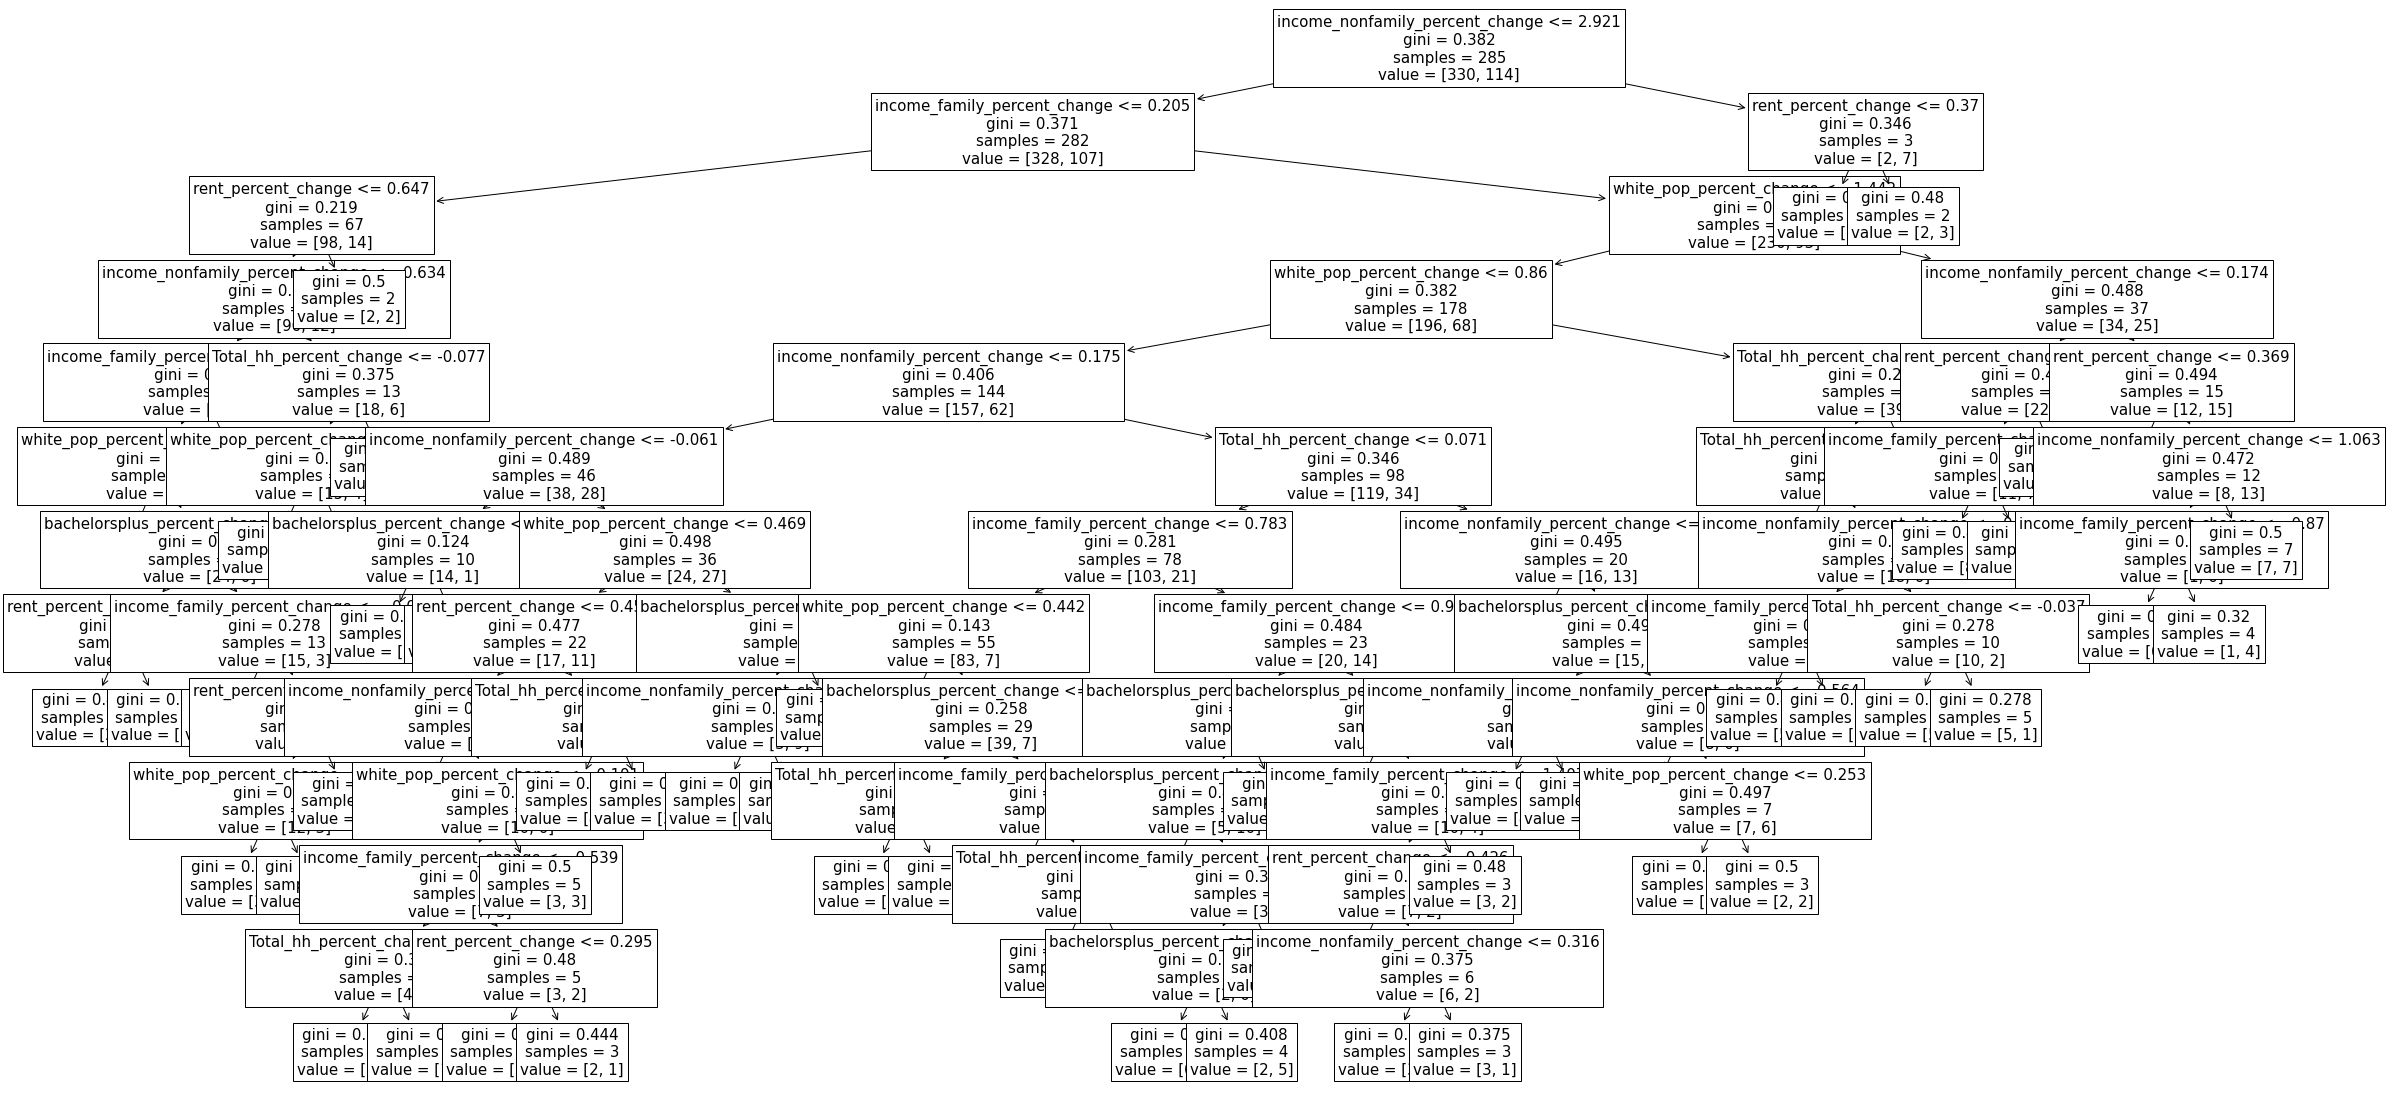

In [16]:
# visualize one of the first estimator (tree)
e = rf.estimators_[0]

from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40,20))  
_ = tree.plot_tree(e, feature_names = X_train.columns, fontsize=15, ax = ax)

In [17]:
#array of prediction
y_pred = rf.predict(X_test)
y_pred

array(['False', 'True', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'True', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'True',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'True', 'True', 'True', 'True', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'True',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'True', 'False', 'False', 'True', 'False', 'True', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'True', 'False', 'False', 'True',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'True', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

print(confusion_matrix(y_test, y_pred))

[[87 15]
 [38  9]]


In [19]:
#assess the performance of the model
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy score: 0.6443


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.70      0.85      0.77       102
        True       0.38      0.19      0.25        47

    accuracy                           0.64       149
   macro avg       0.54      0.52      0.51       149
weighted avg       0.59      0.64      0.60       149



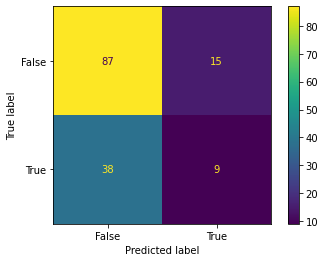

In [21]:
#perform confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Text(0, 0.5, 'Mean decrease in impurity')

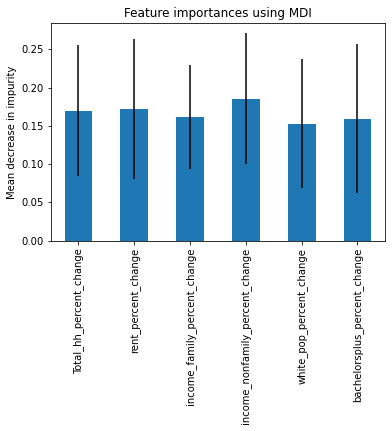

In [22]:
#find how important each factor is in determining the outcome
import matplotlib.pyplot as plt
import numpy as np
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=X_train.columns)

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

**Random Forests 2: percent change of land value with inflation (joingdf)**

For the second random forests model, we follow the steps from model one except changing our y variable to percent change of land value with inflation. The self-determined benchmark (mean value) is slightly different. We are interested in seeing if there's a difference in the prediction with and without inflation.

In [23]:
joingdf['pct_change_w_inflation'].mean()

1.9436443779301185

In [24]:
joingdf['pct_change_w_inflation_1'] = joingdf['pct_change_w_inflation'].apply(lambda x: 'True' if x >= 1.94 else 'False')
joingdf

,CT20_left,pct_change_wo_inflation,pct_change_w_inflation,center_lat,center_lon,neighborhood,geometry,index_right,name,GEOID,...,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id,pct_change_wo_inflation_1,pct_change_w_inflation_1
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",70,Silver Lake,6.037195e+09,...,0.002937,1.050864,0.723906,0.637762,0.376662,0.072989,0.043345,2,False,False
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",64,Silver Lake,6.037195e+09,...,0.080306,0.434956,0.031058,0.145915,-0.176626,-0.017694,0.207923,2,False,False
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",57,Silver Lake,6.037196e+09,...,-0.102114,0.326262,0.175765,0.059115,-0.061067,0.113466,0.111363,2,False,False
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",38,Echo Park,6.037196e+09,...,-0.102114,0.326262,0.175765,0.059115,-0.061067,0.113466,0.111363,2,False,False
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",63,Silver Lake,6.037195e+09,...,0.181814,0.361443,0.492932,0.087209,0.192213,0.005806,0.190026,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,224320,0.614469,0.356696,34.03912567,-118.28154557,Pico-Union,"POLYGON ((-118.27982 34.04055, -118.27917 34.0...",121,Pico-Union,6.037224e+09,...,-0.011529,-0.083896,-0.239708,-0.268425,-0.392852,0.523835,0.029823,2,False,False
76,224320,0.614469,0.356696,34.03912567,-118.28154557,Pico-Union,"POLYGON ((-118.27982 34.04055, -118.27917 34.0...",0,Westlake,6.037210e+09,...,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,2,False,False
76,224320,0.614469,0.356696,34.03912567,-118.28154557,Pico-Union,"POLYGON ((-118.27982 34.04055, -118.27917 34.0...",110,Pico-Union,6.037210e+09,...,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,2,False,False
76,224320,0.614469,0.356696,34.03912567,-118.28154557,Pico-Union,"POLYGON ((-118.27982 34.04055, -118.27917 34.0...",30,Downtown,6.037210e+09,...,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,2,False,False


In [25]:
#random forest with TRUE/FALSE column

xvars2 = ['Total_hh_percent_change', 'rent_percent_change', 'income_family_percent_change','income_nonfamily_percent_change','white_pop_percent_change','bachelorsplus_percent_change']
yvar2 = 'pct_change_w_inflation_1'

# create a dataframe with no NaNs
df_to_fit2 = joingdf[xvars2+[yvar2]].dropna()

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df_to_fit2[xvars2], df_to_fit2[yvar2], test_size = 0.25, random_state = 1)

# check we have a reasonable split
print(len(X_train2), len(y_train2) )
print(len(X_test2), len(y_test2) )

444 444
149 149


In [26]:
rf2 = RandomForestClassifier(n_estimators = 50, random_state = 1)
rf2.fit(X_train2, y_train2)

RandomForestClassifier(n_estimators=50, random_state=1)

In [27]:
y_pred2 = rf2.predict(X_test2)
y_pred2

array(['False', 'True', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'True', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'True',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'True', 'True', 'True', 'True', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'True',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'True', 'False', 'False', 'True', 'False', 'True', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'True', 'False', 'False', 'True',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'True', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 

In [28]:
print(confusion_matrix(y_test2, y_pred2))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test2, y_pred2)))
print(classification_report(y_test2, y_pred2))

[[87 15]
 [38  9]]
Accuracy score: 0.6443
              precision    recall  f1-score   support

       False       0.70      0.85      0.77       102
        True       0.38      0.19      0.25        47

    accuracy                           0.64       149
   macro avg       0.54      0.52      0.51       149
weighted avg       0.59      0.64      0.60       149



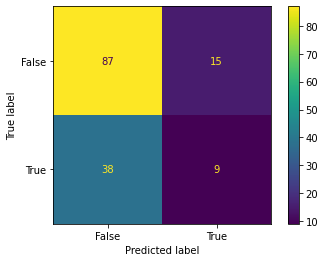

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test2, y_pred2)

Text(0, 0.5, 'Mean decrease in impurity')

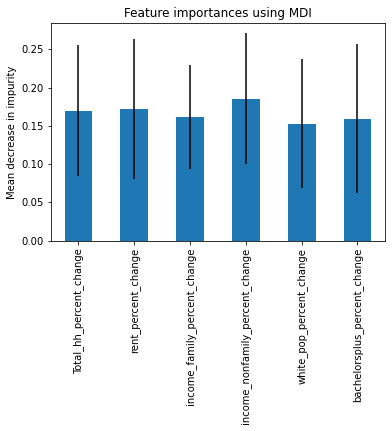

In [30]:
import matplotlib.pyplot as plt
import numpy as np
importances = rf2.feature_importances_

forest_importances = pd.Series(importances, index=X_train2.columns)

std = np.std([tree.feature_importances_ for tree in rf2.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

**Random Forests 3: percent change of land value without inflation (mergegdf)**

In [31]:
mergegdf['pct_change_wo_inflation'].mean()

2.9376826315726587

In [32]:
mergegdf['pct_change_wo_inflation_1'] = mergegdf['pct_change_wo_inflation'].apply(lambda x: 'True' if x >= 2.93 else 'False')
mergegdf

,CT20,pct_change_wo_inflation,pct_change_w_inflation,center_lat,center_lon,neighborhood,geometry_x,name,GEOID,Typology,...,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id,geometry_y,pct_change_wo_inflation_1
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",Silver Lake,6.037195e+09,Stable/Advanced Exclusive,...,0.181814,0.361443,0.492932,0.087209,0.192213,0.005806,0.190026,2.0,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",False
1,195400,0.914325,0.608676,34.08439266,-118.27289005,Silver Lake,"POLYGON ((-118.27208 34.09523, -118.27223 34.0...",Silver Lake,6.037195e+09,Stable Moderate/Mixed Income,...,0.002937,1.050864,0.723906,0.637762,0.376662,0.072989,0.043345,2.0,"POLYGON ((-118.27208 34.09523, -118.27223 34.0...",False
2,195500,1.177144,0.829532,34.08442617,-118.26054948,Echo Park,"POLYGON ((-118.25862 34.09199, -118.25866 34.0...",Echo Park,6.037196e+09,Advanced Gentrification,...,-0.102114,0.326262,0.175765,0.059115,-0.061067,0.113466,0.111363,2.0,"POLYGON ((-118.25862 34.09199, -118.25866 34.0...",False
3,195600,1.265756,0.903997,34.07904517,-118.26702481,Echo Park,"POLYGON ((-118.26196 34.08222, -118.26207 34.0...",Echo Park,6.037196e+09,Advanced Gentrification,...,-0.027297,-0.060814,-0.060761,-0.249993,-0.249951,0.278152,0.050856,2.0,"POLYGON ((-118.26196 34.08222, -118.26207 34.0...",False
4,195710,1.692401,1.262522,34.07296112,-118.27201440,Westlake,"POLYGON ((-118.26497 34.07740, -118.26513 34.0...",Westlake,6.037196e+09,Early/Ongoing Gentrification,...,0.282098,0.241759,1.775012,-0.008367,1.216046,0.748473,0.483924,0.0,"POLYGON ((-118.26497 34.07740, -118.26513 34.0...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,221220,1.154156,0.810215,34.04188868,-118.29215126,Pico-Union,"POLYGON ((-118.29837 34.03998, -118.29742 34.0...",Pico-Union,6.037221e+09,Early/Ongoing Gentrification,...,-0.020631,0.521583,0.237051,0.215093,-0.012127,1.317035,0.854305,3.0,"POLYGON ((-118.29837 34.03998, -118.29742 34.0...",False
73,221602,2.357251,1.821219,34.03882586,-118.28679410,Pico-Union,"POLYGON ((-118.28453 34.04005, -118.28479 34.0...",Pico-Union,6.037222e+09,Low-Income/Susceptible to Displacement,...,0.118037,1.067050,-0.217920,0.650687,-0.375453,1.304751,2.351067,3.0,"POLYGON ((-118.28453 34.04005, -118.28479 34.0...",False
74,224200,0.530880,0.286454,34.03846888,-118.28000305,Pico-Union,"POLYGON ((-118.27389 34.03824, -118.27387 34.0...",Downtown,6.037224e+09,Ongoing Displacement,...,0.411026,1.035441,0.988328,0.625445,0.587822,0.960282,5.416108,1.0,"POLYGON ((-118.27389 34.03824, -118.27387 34.0...",False
75,224310,0.590062,0.336186,34.04267075,-118.28316270,Pico-Union,"POLYGON ((-118.28291 34.04128, -118.28243 34.0...",Pico-Union,6.037224e+09,Advanced Gentrification,...,-0.069912,0.390847,-0.163167,0.110691,-0.331729,0.859842,0.943343,3.0,"POLYGON ((-118.28291 34.04128, -118.28243 34.0...",False


In [33]:
xvars1 = ['Total_hh_percent_change', 'rent_percent_change', 'income_family_percent_change','income_nonfamily_percent_change','white_pop_percent_change','bachelorsplus_percent_change']
yvar1 = 'pct_change_wo_inflation_1'

# create a dataframe with no NaNs
df_to_fit1 = mergegdf[xvars1+[yvar1]].dropna()

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    df_to_fit1[xvars1], df_to_fit1[yvar1], test_size = 0.25, random_state = 1)

# check we have a reasonable split
print(len(X_train1), len(y_train1) )
print(len(X_test1), len(y_test1) )

45 45
16 16


In [34]:
rf1 = RandomForestClassifier(n_estimators = 50, random_state = 1)
rf1.fit(X_train1, y_train1)

RandomForestClassifier(n_estimators=50, random_state=1)

In [35]:
y_pred1 = rf1.predict(X_test1)
y_pred1

array(['False', 'False', 'False', 'False', 'False', 'False', 'False',
       'True', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False'], dtype=object)

In [36]:
print(confusion_matrix(y_test1, y_pred1))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test1, y_pred1)))
print(classification_report(y_test1, y_pred1))

[[12  0]
 [ 3  1]]
Accuracy score: 0.8125
              precision    recall  f1-score   support

       False       0.80      1.00      0.89        12
        True       1.00      0.25      0.40         4

    accuracy                           0.81        16
   macro avg       0.90      0.62      0.64        16
weighted avg       0.85      0.81      0.77        16



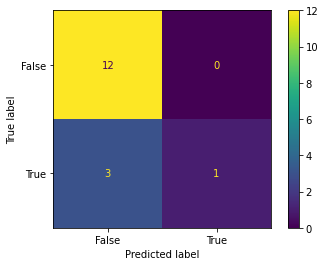

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test1, y_pred1)

Text(0, 0.5, 'Mean decrease in impurity')

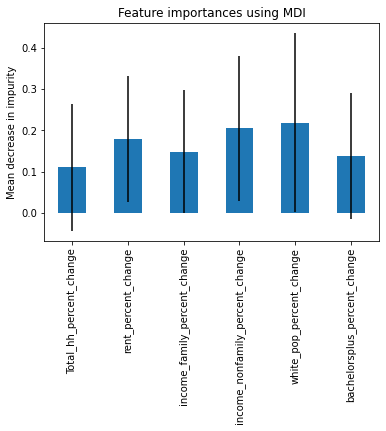

In [38]:
import matplotlib.pyplot as plt
import numpy as np
importances = rf1.feature_importances_

forest_importances = pd.Series(importances, index=X_train1.columns)

std = np.std([tree.feature_importances_ for tree in rf1.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

**Random Forests 4: percent change of land value with inflation (mergegdf)**

In [39]:
mergegdf['pct_change_w_inflation'].mean()

2.3089770013215625

In [40]:
mergegdf['pct_change_w_inflation_1'] = mergegdf['pct_change_w_inflation'].apply(lambda x: 'True' if x >= 2.31 else 'False')
mergegdf

,CT20,pct_change_wo_inflation,pct_change_w_inflation,center_lat,center_lon,neighborhood,geometry_x,name,GEOID,Typology,...,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id,geometry_y,pct_change_wo_inflation_1,pct_change_w_inflation_1
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",Silver Lake,6.037195e+09,Stable/Advanced Exclusive,...,0.361443,0.492932,0.087209,0.192213,0.005806,0.190026,2.0,"POLYGON ((-118.25925 34.09713, -118.25924 34.0...",False,False
1,195400,0.914325,0.608676,34.08439266,-118.27289005,Silver Lake,"POLYGON ((-118.27208 34.09523, -118.27223 34.0...",Silver Lake,6.037195e+09,Stable Moderate/Mixed Income,...,1.050864,0.723906,0.637762,0.376662,0.072989,0.043345,2.0,"POLYGON ((-118.27208 34.09523, -118.27223 34.0...",False,False
2,195500,1.177144,0.829532,34.08442617,-118.26054948,Echo Park,"POLYGON ((-118.25862 34.09199, -118.25866 34.0...",Echo Park,6.037196e+09,Advanced Gentrification,...,0.326262,0.175765,0.059115,-0.061067,0.113466,0.111363,2.0,"POLYGON ((-118.25862 34.09199, -118.25866 34.0...",False,False
3,195600,1.265756,0.903997,34.07904517,-118.26702481,Echo Park,"POLYGON ((-118.26196 34.08222, -118.26207 34.0...",Echo Park,6.037196e+09,Advanced Gentrification,...,-0.060814,-0.060761,-0.249993,-0.249951,0.278152,0.050856,2.0,"POLYGON ((-118.26196 34.08222, -118.26207 34.0...",False,False
4,195710,1.692401,1.262522,34.07296112,-118.27201440,Westlake,"POLYGON ((-118.26497 34.07740, -118.26513 34.0...",Westlake,6.037196e+09,Early/Ongoing Gentrification,...,0.241759,1.775012,-0.008367,1.216046,0.748473,0.483924,0.0,"POLYGON ((-118.26497 34.07740, -118.26513 34.0...",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,221220,1.154156,0.810215,34.04188868,-118.29215126,Pico-Union,"POLYGON ((-118.29837 34.03998, -118.29742 34.0...",Pico-Union,6.037221e+09,Early/Ongoing Gentrification,...,0.521583,0.237051,0.215093,-0.012127,1.317035,0.854305,3.0,"POLYGON ((-118.29837 34.03998, -118.29742 34.0...",False,False
73,221602,2.357251,1.821219,34.03882586,-118.28679410,Pico-Union,"POLYGON ((-118.28453 34.04005, -118.28479 34.0...",Pico-Union,6.037222e+09,Low-Income/Susceptible to Displacement,...,1.067050,-0.217920,0.650687,-0.375453,1.304751,2.351067,3.0,"POLYGON ((-118.28453 34.04005, -118.28479 34.0...",False,False
74,224200,0.530880,0.286454,34.03846888,-118.28000305,Pico-Union,"POLYGON ((-118.27389 34.03824, -118.27387 34.0...",Downtown,6.037224e+09,Ongoing Displacement,...,1.035441,0.988328,0.625445,0.587822,0.960282,5.416108,1.0,"POLYGON ((-118.27389 34.03824, -118.27387 34.0...",False,False
75,224310,0.590062,0.336186,34.04267075,-118.28316270,Pico-Union,"POLYGON ((-118.28291 34.04128, -118.28243 34.0...",Pico-Union,6.037224e+09,Advanced Gentrification,...,0.390847,-0.163167,0.110691,-0.331729,0.859842,0.943343,3.0,"POLYGON ((-118.28291 34.04128, -118.28243 34.0...",False,False


In [41]:
xvars3 = ['Total_hh_percent_change', 'rent_percent_change', 'income_family_percent_change','income_nonfamily_percent_change','white_pop_percent_change','bachelorsplus_percent_change']
yvar3 = 'pct_change_w_inflation_1'

# create a dataframe with no NaNs
df_to_fit3 = mergegdf[xvars3+[yvar3]].dropna()

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    df_to_fit3[xvars3], df_to_fit3[yvar3], test_size = 0.25, random_state = 1)

# check we have a reasonable split
print(len(X_train3), len(y_train3) )
print(len(X_test3), len(y_test3) )

45 45
16 16


In [42]:
rf3 = RandomForestClassifier(n_estimators = 50, random_state = 1)
rf3.fit(X_train3, y_train3)

RandomForestClassifier(n_estimators=50, random_state=1)

In [43]:
y_pred3 = rf3.predict(X_test3)
y_pred3

array(['False', 'False', 'False', 'False', 'False', 'False', 'False',
       'True', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False'], dtype=object)

In [44]:
print(confusion_matrix(y_test3, y_pred3))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test3, y_pred3)))
print(classification_report(y_test3, y_pred3))

[[12  0]
 [ 3  1]]
Accuracy score: 0.8125
              precision    recall  f1-score   support

       False       0.80      1.00      0.89        12
        True       1.00      0.25      0.40         4

    accuracy                           0.81        16
   macro avg       0.90      0.62      0.64        16
weighted avg       0.85      0.81      0.77        16



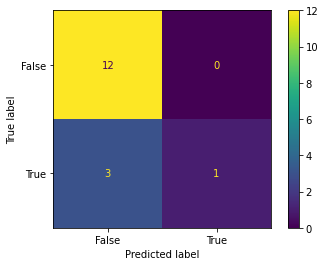

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test3, y_pred3)

Text(0, 0.5, 'Mean decrease in impurity')

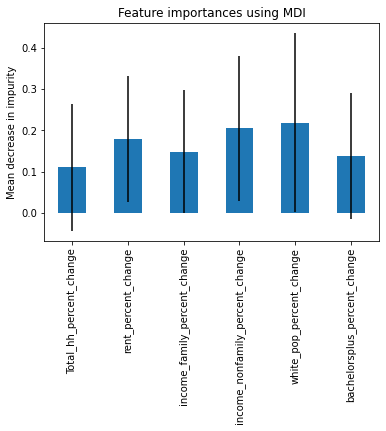

In [46]:
import matplotlib.pyplot as plt
import numpy as np
importances = rf3.feature_importances_

forest_importances = pd.Series(importances, index=X_train3.columns)

std = np.std([tree.feature_importances_ for tree in rf3.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

## Continuous Variables

**Experimented Random Forests: percent change of land value without inflation (joingdf)**

In [47]:
xvars4 = ['Total_hh_percent_change', 'rent_percent_change', 'income_family_percent_change','income_nonfamily_percent_change','white_pop_percent_change','bachelorsplus_percent_change']
yvar4 = 'pct_change_wo_inflation'

# create a dataframe with no NaNs
df_to_fit4 = joingdf[xvars4+[yvar4]].dropna()

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    df_to_fit4[xvars4], df_to_fit4[yvar4], test_size = 0.25, random_state = 1)

# check we have a reasonable split
print(len(X_train4), len(y_train4) )
print(len(X_test4), len(y_test4) )

444 444
149 149


In [48]:
from sklearn.ensemble import RandomForestRegressor 

rf4 = RandomForestRegressor(n_estimators = 50, random_state = 1)
rf4.fit(X_train4, y_train4)

RandomForestRegressor(n_estimators=50, random_state=1)

In [49]:
y_pred4 = rf4.predict(X_test4)
y_pred4

array([ 0.94894199,  2.60348614,  2.23656487,  3.34834429,  2.26486311,
        1.62761708,  1.62761708,  0.78924769,  2.01858302,  2.68340693,
        0.94894199,  3.60132198,  5.62053806,  2.68340693,  3.64692348,
        3.682448  ,  2.86747439,  1.95642159,  1.79951938,  1.79951938,
        3.78178704,  3.60132198,  1.19966284,  1.46976825,  1.62761708,
        3.682448  ,  1.44890583,  2.27045125,  1.10531916,  1.79951938,
        1.19966284,  1.61269613,  2.01858302,  2.27045125,  1.1819592 ,
        3.02223918,  5.75990116,  2.84781319,  2.86468829,  1.22039054,
        1.06530228,  2.23656487,  0.96440331,  3.60132198,  1.35836938,
        1.1819592 ,  1.27743934,  2.5497659 ,  2.27045125,  3.33978965,
        1.19966284,  2.5497659 ,  0.94894199,  1.1819592 ,  3.60132198,
        3.60132198,  3.60132198,  2.03885463,  2.27045125,  1.32813099,
        2.84781319,  1.61269613, 11.25768307,  1.35836938,  0.94894199,
        1.89755165,  1.09094377,  1.37409775,  3.34834429,  9.91

In [50]:
print('Predicted fraction True: {:.4f}. Actual fraction True: {:.4f}'.format(
    y_pred4.mean(), y_test4.mean()))

Predicted fraction True: 2.3985. Actual fraction True: 2.5862


In [51]:
y_pred4 = pd.DataFrame(y_pred4, columns = ['y_pred4'])
y_pred4

,y_pred4
0,0.948942
1,2.603486
2,2.236565
3,3.348344
4,2.264863
...,...
144,1.181959
145,2.745107
146,2.018583
147,1.059217


In [52]:
y_test4 = y_test4.to_frame()
y_test4 = y_test4.reset_index()

In [53]:
y_pred_y_test4 = y_pred4.join(y_test4)
y_pred_y_test4

,y_pred4,index,pct_change_wo_inflation
0,0.948942,69,0.659968
1,2.603486,43,0.838962
2,2.236565,51,7.127638
3,3.348344,67,1.338588
4,2.264863,62,0.929293
...,...,...,...
144,1.181959,42,4.652347
145,2.745107,5,0.853547
146,2.018583,61,0.801814
147,1.059217,0,0.909110


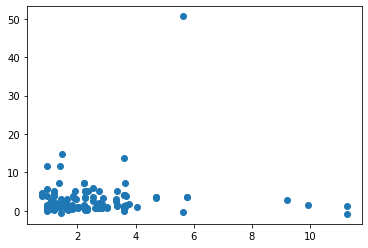

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(y_pred_y_test4.y_pred4, y_pred_y_test4.pct_change_wo_inflation)

**Random Forests Model 1 & 2:**
We conduct random forests model 1 and 2 with the joining dataframe with around 600 rows.

The accuracy score for random forests model 1 and 2 are both 0.6443. In terms of confusion matrix, the true positive number is 9 (6%), the true negative number is 87 (58.4%), the false positive number is 15 (10.1%) and the false negative number is 38 (25.5%). 

Our model correctly predict 58.4% in the negative class and 6% in the positive class. In our case, the negative class is considered the less gentrified class with percent change of land value below the mean and the positive class is considered the more gentrified class with percent change of the land value higher than the mean. 

Prediction for the less gentrified class is pretty accurate, however, not so much for the more gentrified class. One possible reason could be the distribution of our data where majority of the rows are concentrated in the less gentrified class causing the lack of training and testing samples for the upper end. It could also caused by a few outliers. Next time, we might try to drop the outlier samples and focus on the range where majority of the samples located.

In terms of the comparison of with and without inflation, there is no apparent difference between the two prediction. They have the same accuracy score and confusion matrix model. We think that the inflation rate (1.19%) is not big enough to create a huge difference in the prediction. In the future, it would be interesting for us to look at the years around 2008 and 2020 where there were higher inflation rates.

The rank of importance of each factor for the prediction is percent change of nonfamily income, percent change of rent, percent change of average number of ppl per household, percent change of numbers of bachelors, percent change of family income and percent change of white population. The percent of of nonfamily income plays the greatest role in this prediction model. This result makes a lot of sense because gentrification, a lot of time, is associated with people who are single with increasing income driving up prices.


**Random Forests Model 3 & 4:**
We conduct random forests model 3 and 4 with the merging dataframe with only 99 rows. 

Given such a small sample size, we are not sure if we will be able to draw any significance from the models. The accuracy score of 0.80 is pretty high, but again, with the lack of samples, we are not sure if the models will provide meaningful findings.

**Random Forest with continuous variable**
We also attempt to create a random forests model with a continous variable. In this case, we use the percent change of land value without inflation from the join gdf. We use the random forest regressor to predict and graph a seaborn scatterplot. 

Given the predicted fraction True: 2.3985 and actual fraction True: 2.5862, the prediction may be pretty accurate. The seaborn scatterplot shows that it seems like most percent change of land value will be around 1-4%.

**Limitations and Improvements**

There are many limitations for our random forests modeling. 

1. The sample size is small.
2. Duplicates problem when joining/merging datasets influence the precision.
3. The self-determined benchmark of the dichotomous variable (mean value) is not ideal. 

What we can do next time:
1. Find a larger sample size. We can include more neighborhoods in Los Angeles.
2. Be more precise in data cleanup,
3. Find a more suitable benchmark. Mean might not be the best with outliers.
4. Have more variables and trees, and adjust other hyperparameters

**THOUGHTS**

It was interesting but also intimidating to do random forests modeling for our final project. Random forests is one of the most confusing machine learning methods for us, but we did want to try if we could find meaningful output. Our sizes of datasets, choices of variables, and the results are far from being ideal. There are certainly a lot of mistakes made during the process. Nevertheless, we did learn a lot testing, trying and trouble shooting codes. 